***Tugas 2 II4035 Sistem Cerdas***
---

Nama	: Gyan Maiziko

NIM	: 18221008

**Instruksi**

Diberikan data supermarket di link berikut (https://drive.google.com/file/d/1B04dU9P9T_QwXHdt6ScUwElz2ppLcgG7/view), lakukanlah Data Preparation terhadap dataset tersebut dan lakukanlah analisis Regresi untuk memprediksi penjualan berdasarkan fitur-fitur dari dataset yang diberikan sesuai yang telah diajarkan di perkuliahan.
 

Lengkapi source code dengan komentar yang menjelaskan isi source code.
 

Kemudian, jawablah pertanyaan berikut menggunakan dataset tersebut:
1. Ada beberapa nilai yang hilang di kolom PostalCode. Bagaimana Anda akan menentukan apakah baris-baris tersebut perlu dihapus atau ada cara lain untuk mengatasi nilai yang hilang ini?
2. Ubah format atribut OrderDate dan ShipDate dari string menjadi datetime. Jelaskan mengapa transformasi ini penting sebelum melakukan analisis lebih lanjut!
3. Buatlah kolom baru yang menyatakan nama hari ketika pesanan dibuat dari OrderDate dengan nama kolom OrderDateName. Bagaimana penambahan informasi ini dapat memberikan insight tambahan dalam analisis Anda?
4. Apakah hari pembelian (misalnya, weekdays vs weekends) berpengaruh signifikan terhadap total penjualan? (Hint: Gunakan atribut Order Day Name yang telah dibuat sebelumnya sebagai variabel independen untuk memodelkan pengaruhnya terhadap atribut Sales)
5. Bagaimana kategori produk mempengaruhi jumlah penjualan, dan kategori mana yang paling menguntungkan? (Hint: Gunakan atribut Category sebagai salah satu variabel independen untuk melihat pengaruhnya terhadap Sales. Analisis juga faktor-faktor lainnya yang mungkin berpengaruh)
6. Apakah terdapat perbedaan signifikan dalam jumlah penjualan berdasarkan mode pengiriman yang dipilih pelanggan? (Hint: Modelkan atribut Sales dengan menggunakan atribut Ship Mode sebagai variabel independen)

***Data Preparation***
---

In [1]:
import pandas as pd  # Mengimport library pandas yang akan digunakan untuk membaca dan memanipulasi data 
import numpy as np # Mengimport library Numpy untuk melakukan manipulasi dan perhitungan pada data jika dibutuhkan dan juga mencari nilai unik kategori yang ada pada sebuah kolom 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Membaca data yang berformatkan CSV yang berada pada folder yang sama s
# ehingga tidak perlu memasukkan path yang panjang, data yang dibaca dirubah menjadi data frame 
sdf = pd.read_csv("EDA-supermarket.csv") 

##### 1. Ada beberapa nilai yang hilang di kolom Postal Code Bagaimana Anda akan menentukan apakah baris-baris tersebut perlu dihapus atau ada cara lain untuk mengatasi nilai yang hilang ini?

In [3]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
temp = sdf["Postal Code"].isnull()
temp2 = temp.values
count = 0
for i in range(len(temp2)):
    if (temp2[i] == True):
        count += 1
print("Total rows yang kosong pada kolom Postal Code ada sebanyak ", count, "dari total rows sebanyak",len(temp2),"rows")

Total rows yang kosong pada kolom Postal Code ada sebanyak  11 dari total rows sebanyak 9800 rows


In [18]:
#Check for missing values not null but ?
for i in range(len(sdf.columns)):
    print("Attribute-", i, ':', sdf.columns[i], ', Number of ?:', sdf[sdf[sdf.columns[i]] == '?'].shape[0])

Attribute- 0 : Row ID , Number of ?: 0
Attribute- 1 : Order ID , Number of ?: 0
Attribute- 2 : Order Date , Number of ?: 0
Attribute- 3 : Ship Date , Number of ?: 0
Attribute- 4 : Ship Mode , Number of ?: 0
Attribute- 5 : Customer ID , Number of ?: 0
Attribute- 6 : Customer Name , Number of ?: 0
Attribute- 7 : Segment , Number of ?: 0
Attribute- 8 : Country , Number of ?: 0
Attribute- 9 : City , Number of ?: 0
Attribute- 10 : State , Number of ?: 0
Attribute- 11 : Postal Code , Number of ?: 0
Attribute- 12 : Region , Number of ?: 0
Attribute- 13 : Product ID , Number of ?: 0
Attribute- 14 : Category , Number of ?: 0
Attribute- 15 : Sub-Category , Number of ?: 0
Attribute- 16 : Product Name , Number of ?: 0
Attribute- 17 : Sales , Number of ?: 0


In [5]:
sdf[sdf['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [19]:
sdf[(sdf['City'] == 'Burlington') & (sdf['State'] == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Pada percobaan untuk mencari postal code yang bernilai NaN di atas diketahui bahwa postal code dengan city Burlington dan state Vermont yang tidak memiliki postal code. Untuk menangani data kosong atau missing value pada postal code untuk city dan state tersebut kita akan mengisinya dengan data yang diperoleh dari google terkait kode postal code Burlington dengan state Vermont. 

Setelah dicari menurut https://www.unitedstateszipcodes.org/05401/, postal code atau ZIP code untuk kota Burlington, Vermont adalah 05401. Oleh karena itu, mari kita ganti saja nilai null yang ada di dataset menjadi 05401 karena semua postal code yang null merupakan order dari Burlington, Vermont.

In [21]:
# Mengisi postal code pada city Burlington dengan state Vermont dengan postal code 05401
sdf['Postal Code'].fillna("05401",inplace=True)

C:\Users\maizi\AppData\Local\Temp\ipykernel_8496\3845150745.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '05401' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  sdf['Postal Code'].fillna("05401",inplace=True)


In [22]:
# Mengecek data null setelah data null tadi di isi dengan postal code Burlington Vermont 05401
sdf[(sdf['City'] == 'Burlington') & (sdf['State'] == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,05401,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,05401,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [23]:
# Check null 
sdf.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [24]:
temp = sdf["Postal Code"].isnull()
temp2 = temp.values
count = 0
for i in range(len(temp2)):
    if (temp2[i] == True):
        count += 1
print("Total rows yang kosong pada kolom Postal Code ada sebanyak ", count, "dari total rows sebanyak",len(temp2),"rows")

Total rows yang kosong pada kolom Postal Code ada sebanyak  0 dari total rows sebanyak 9800 rows


Nilai kosong atau missing value sudah tidak ada lagi pada dataset, Nilai hilang pada kolom postal code teratasi dengan baik.

***2. Perubahan Format atribut OrderDate dan Shipdate dari String Menjadi Datetime***

Teknik perubahan format ini biasa disebut dengan "Feature Transformation". Hal ini penting untuk dilakukan karena pada saat analisis dan visualisasi data nanti, format tanggal yang sesuai diperlukan untuk dapat membuat grafik dan visualisasi lain yang sesuai dengan apa yang diharapkan. Misalnya ketika kita hendak membuat line chart untuk penjualan dari waktu ke waktu yang membutuhkan format tanggal menjadi format datetime ketimbang format object. Jika kolom OrderDate masih string, sistem tidak akan mengetahui bahwa itu adalah tanggal bukan string, sehingga line chart yang terbentuk sangat mungkin menjadi aneh, misalnya dengan adanya tanggal tanggal yang tidak berurutan satu sama lain. Dengan feature transformation menjadi format datetime yang benar, sistem juga akan memahami bahwa data tersebut merupakan tanggal sehingga dapat menyesuaikan visualisasinya dengan tepat untuk grafik yang akan dibuat. Selain itu, feature transformation ini juga akan sangat berguna jika kita hendak memanipulasi dan mempartisi tanggal tersebut sesuai dengan kebutuhan misalnya bisa kita ambil atau partisi menjadi hari, bulan, ataupun tahun untuk melakukan analisis lebih dalam

In [25]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [28]:
sdf["Order Date"] = pd.DatetimeIndex(sdf['Order Date'])
sdf["Ship Date"] = pd.DatetimeIndex(sdf["Ship Date"])
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [29]:
sdf.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Alasan mengapa merubah type data Order Date dan Ship Date yang awalnya merupakan object atau string menjadi datetime karena data dengan type datetime dapat lebih mudah untuk dipartisi atau dimanipulasi sehingga type data pada kedua atribut perlu dirubah karena keperluan untuk memperoleh waktu dari kedua atribut tersebut untuk dapat diekstrak

***3. Buatlah kolom baru yang menyatakan nama hari ketika pesanan dibuat dari Order Date dengan nama kolom Order Date Name Bagaimana penambahan informasi ini dapat memberikan insight tambahan dalam analisis Anda?***

In [32]:
# Membuat kolom baru yang menyatakan nama hari ketika pesanan dibuat dari Order Date dengan nama kolom Order Date Name 
sdf["Order Date Name"] = sdf["Order Date"].dt.strftime('%A')
sdf


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Sunday
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Thursday
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Thursday
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Thursday


In [31]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Row ID           9800 non-null   int64         
 1   Order ID         9800 non-null   object        
 2   Order Date       9800 non-null   datetime64[ns]
 3   Ship Date        9800 non-null   datetime64[ns]
 4   Ship Mode        9800 non-null   object        
 5   Customer ID      9800 non-null   object        
 6   Customer Name    9800 non-null   object        
 7   Segment          9800 non-null   object        
 8   Country          9800 non-null   object        
 9   City             9800 non-null   object        
 10  State            9800 non-null   object        
 11  Postal Code      9800 non-null   object        
 12  Region           9800 non-null   object        
 13  Product ID       9800 non-null   object        
 14  Category         9800 non-null   object 

Kolom Order Date Name yang berisi ekstraksi nama hari dari kolom Order Date sudah berhasil ditambahkan. 

Penambahan informasi ini dapat memberikan insight tambahan dalam analisis nantinya, berikut beberapa insight yang sekiranya diperoleh. 

- Hari dengan pesanan yang paling banyak dibuat yang Dapat digunakan untuk keperluan marketing dan promosi 
- Hari dengan pesanan yang paling sedikit yang Dapat digunakan untuk menghemat biaya pengiriman dengan mengurangi sumber daya di hari tersebut. 
- Analisis pesanan pada setiap harinya di setiap wilayah yang Dapat digunakan untuk menyesuaikan strategi penjualan khysus di wilayah wilayah tertentu
- Analisis pesanan pada setiap harinya untuk setiap kategori ship mode yang nantinya dapat digunakan untuk menghemat biaya shipping dengan menyesuaikan jumlah kategori mode pengiriman sesuai dengan data prediksi.
- Analisis penjualan berdasarkan tipe hari yaitu weekday dan weekend melihat ketehubunganya nantinya. 

Dan Masih banyak lagi. 

***Regression***
---

##### 4. Apakah hari pembelian (misalnya, weekdays vs weekends) berpengaruh signifikan terhadap total penjualan? (Hint: Gunakan atribut Order Day Name yang telah dibuat sebelumnya sebagai variabel independen untuk memodelkan pengaruhnya terhadap atribut Sales)

In [33]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np 

In [34]:
days_category = {"Order Date Name": {"Monday":"Weekday", "Tuesday":"Weekday", "Wednesday":"Weekday", "Thursday":"Weekday", "Friday":"Weekday", "Saturday":"Weekend", "Sunday":"Weekend"}}
sdf = sdf.replace(days_category)
sdf

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Weekday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Weekday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Weekday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Weekday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Weekend
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Weekday
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Weekday
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Weekday


In [35]:
sdf['Order Date Name'] = sdf['Order Date Name'].astype("category")
sdf["Order Date Name Binary"] = sdf["Order Date Name"].cat.codes
sdf

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name,Order Date Name Binary
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Weekday,0
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Weekday,0
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Weekday,0
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Weekday,0
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Weekday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Weekend,1
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Weekday,0
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Weekday,0
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Weekday,0


In [36]:
sdfc = sdf[['Sales','Order Date Name Binary']]
sdfc

,Sales,Order Date Name Binary
0,261.9600,0
1,731.9400,0
2,14.6200,0
3,957.5775,0
4,22.3680,0
...,...,...
9795,3.7980,1
9796,10.3680,0
9797,235.1880,0
9798,26.3760,0


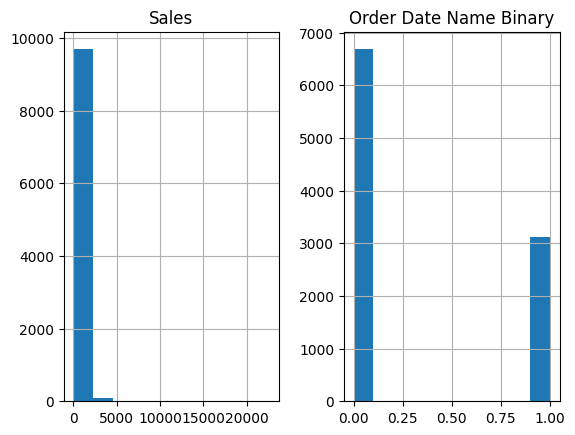

In [40]:
# Menampilkan data histogram
sdfc.hist()
plt.show()

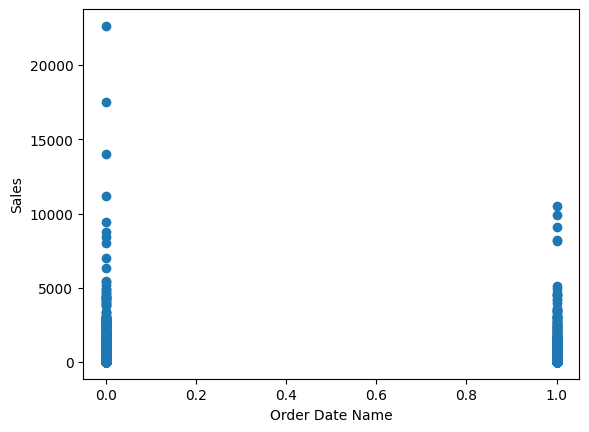

In [41]:
# Buat scatter plotnya
plt.scatter(sdfc["Order Date Name Binary"], sdfc["Sales"])
plt.xlabel("Order Date Name")
plt.ylabel("Sales")
plt.show()

In [50]:
#Pembuatan dataset pelatihan dan pengujian
msk = np.random.rand(len(sdf)) < 0.8
train = sdfc[msk]
test = sdfc[~msk]

In [51]:
#Buat model regresi sederhananya
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Order Date Name Binary']])
train_y = np.asanyarray(train[['Sales']])
regr.fit(train_x, train_y)
#The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[2.67854352]]
Intercept: [232.9338023]


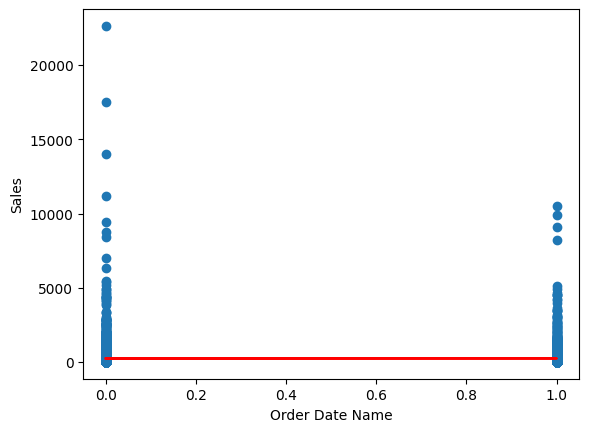

In [52]:
#Plot output model
plt.scatter(train["Order Date Name Binary"], train["Sales"])
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Order Date Name")
plt.ylabel("Sales")
plt.show()

In [53]:
#Evaluasi
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["Order Date Name Binary"]])
test_y = np.asanyarray(test[["Sales"]])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 257.77
Residual sum of squares (MSE): 231011.20
R2-score: -148538.16


Setelah dicoba untuk mengetahui pengaruh weekday atau weekend dapat diketahui bahwa pada visualisasi maupun pada hasil evaluasi bahwa korelasi antara pembelian pada weekday dan weekend dengan total penjualan sangat minim, bahka bisa dikatakan tidak ada korelasinya. Mayoritas pesanan dibuat pada Weekday maupun weekend memiliki nilai sales atau penjualan yang cenderung mirip

***5. Pengaruh kategori produk terhadap jumlah penjualan***

In [54]:
sdf["Category"] = sdf["Category"].astype("category")
sdf["cat_Category"] = sdf["Category"].cat.codes
sdf

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name,Order Date Name Binary,cat_Category
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Weekday,0,0
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Weekday,0,0
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Weekday,0,1
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Weekday,0,0
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Weekday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Weekend,1,1
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Weekday,0,1
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Weekday,0,2
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Weekday,0,2


In [55]:
# memotong dataset menjadi hanya kolom sales dan cat category 
sdf2 = sdf[["Sales", "cat_Category"]]
sdf2

,Sales,cat_Category
0,261.9600,0
1,731.9400,0
2,14.6200,1
3,957.5775,0
4,22.3680,1
...,...,...
9795,3.7980,1
9796,10.3680,1
9797,235.1880,2
9798,26.3760,2


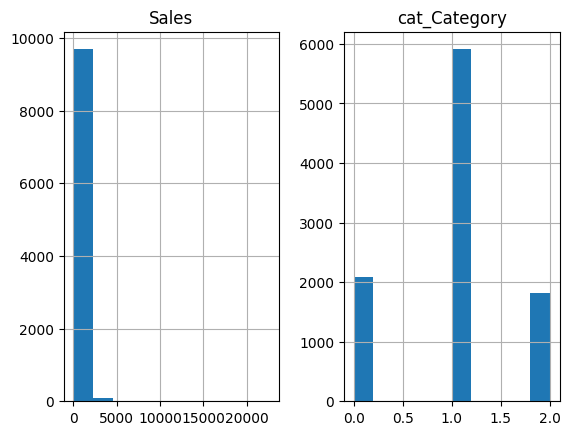

In [56]:
#Buat histogramnya
sdf2.hist()
plt.show()

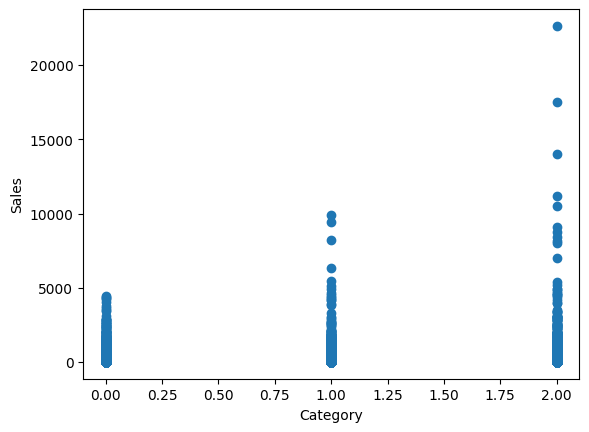

In [57]:
#Buat scatter plotnya
plt.scatter(sdf2["cat_Category"], sdf2["Sales"])
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [58]:
# Pembuatan dataset pelatihan dan pengujian 
sdp = np.random.rand(len(sdf)) < 0.8
train1 = sdf2[sdp]
test1 = sdf2[sdp]

In [59]:
#Buat model regresi sederhananya
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train1[['cat_Category']])
train_y1 = np.asanyarray(train1[['Sales']])
regr1.fit(train_x1, train_y1)
#The coefficients
print('Coefficients:', regr1.coef_)
print('Intercept:', regr1.intercept_)

Coefficients: [[47.27198217]]
Intercept: [185.31185984]


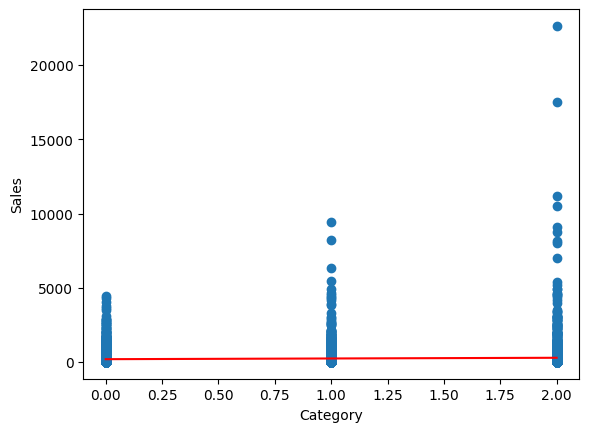

In [60]:
#Plot output model
plt.scatter(train1["cat_Category"], train1["Sales"])
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r')
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [61]:
#Evaluasi
test_x1 = np.asanyarray(test1[["cat_Category"]])
test_y1 = np.asanyarray(test1[["Sales"]])
test_y_1 = regr1.predict(test_x1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_1 - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_1 - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y_1, test_y1))

Mean absolute error: 271.60
Residual sum of squares (MSE): 398217.68
R2-score: -450.39


Setelah dilakukan regresi diperoleh bahwa pada visualisasu dan hasil evaluasi bahwa korelasi antara kategori produk dengan total penjualan sangat minim, bahkan bisa dikatakan tidak ada korelasinya. Mayoritas pesanan untuk setiap kategori memiliki nilai sales yang cenderung mirip

***6. Apakah terdapat perbedaan signifikan dalam jumlah penjualan berdasarkan mode pengiriman yang dipilih pelanggan? (Hint: Modelkan atribut Sales dengan menggunakan atribut Ship Mode sebagai variabel independen)***

In [66]:
#Ubah tipe data kolom Ship Mode menjadi Category
sdf["Ship Mode"] = sdf["Ship Mode"].astype("category")
sdf["Cat Ship Mode"] = sdf["Ship Mode"].cat.codes
sdf

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name,Order Date Name Binary,cat_Category,Ship Mode Cat,Cat Ship Mode
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Weekday,0,0,2,2
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Weekday,0,0,2,2
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Weekday,0,1,2,2
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Weekday,0,0,3,3
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Weekday,0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Weekend,1,1,3,3
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Weekday,0,1,3,3
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Weekday,0,2,3,3
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Weekday,0,2,3,3


In [67]:
#Potong dataset menjadi hanya kolom Sales dan Ship Mode Cat
sdf3 = sdf[["Sales", "Cat Ship Mode"]]
sdf3

,Sales,Cat Ship Mode
0,261.9600,2
1,731.9400,2
2,14.6200,2
3,957.5775,3
4,22.3680,3
...,...,...
9795,3.7980,3
9796,10.3680,3
9797,235.1880,3
9798,26.3760,3


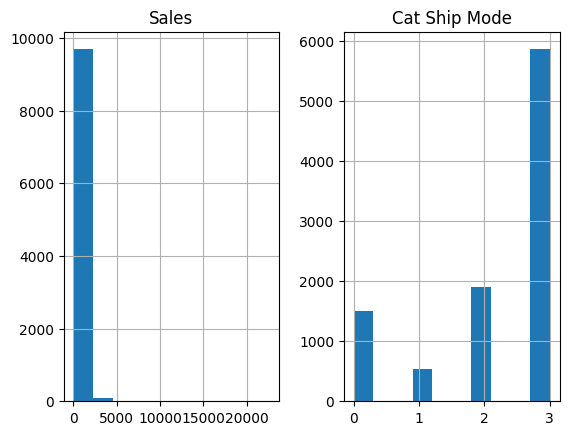

In [68]:
#Buat histogramnya
sdf3.hist()
plt.show()

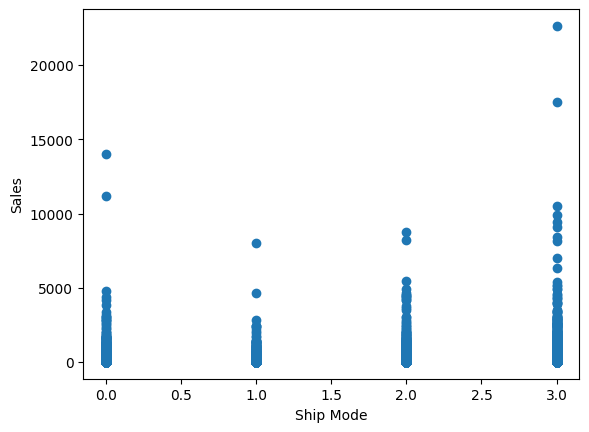

In [69]:
#Buat scatter plotnya
plt.scatter(sdf3["Cat Ship Mode"], sdf3["Sales"])
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()

In [70]:
#Pembuatan dataset pelatihan dan pengujian
skp3 = np.random.rand(len(sdf)) < 0.8
train2 = sdf3[skp3]
test2 = sdf3[~skp3]

In [71]:
#Buat model regresi sederhananya
regr2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train2[['Cat Ship Mode']])
train_y2 = np.asanyarray(train2[['Sales']])
regr2.fit(train_x2, train_y2)
#The coefficients
print('Coefficients:', regr2.coef_)
print('Intercept:', regr2.intercept_)

Coefficients: [[-2.42951079]]
Intercept: [240.98443265]


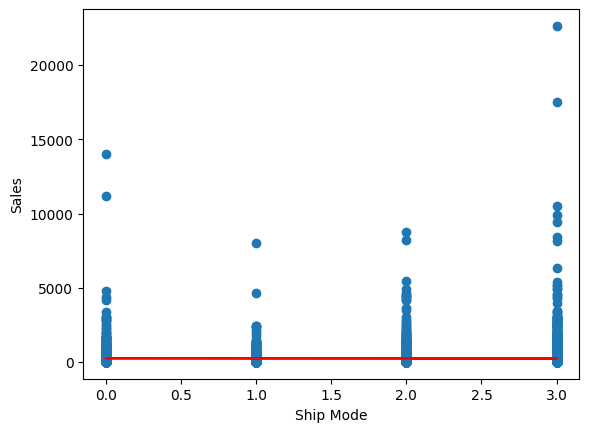

In [72]:
#Plot output model
plt.scatter(train2["Cat Ship Mode"], train2["Sales"])
plt.plot(train_x2, regr2.coef_[0][0]*train_x2 + regr2.intercept_[0], '-r')
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()

In [73]:
#Evaluasi
test_x2 = np.asanyarray(test2[["Cat Ship Mode"]])
test_y2 = np.asanyarray(test2[["Sales"]])
test_y_2 = regr2.predict(test_x2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_2 - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_2 - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y_2, test_y2))

Mean absolute error: 253.56
Residual sum of squares (MSE): 233352.10
R2-score: -32149.04


Setelah dilakukan proses regresi diperoleh bahwa hasil visualisasi pada gambar scatterplot diatas tidak menunjukkan adanya korleasi antara mode pengiriman dan juga total penjualan atau korelasinya sangat minim, bahkan bisa dikatakan tidak ada korelasi. Mayoritas pesanan di setiap mode pengiriman memiliki nilai sales yang cenderung mirip.

***Kesimpulan Dataset yang digunakan saat ini memiliki kualitas yang kurang baik jika ingin dilakukan regresi hal ini tegambarkan dari hasil regresi yang sudah dilakukan pada data diatas untuk melihat korelasi antar atribut pada data terutama pada atribut kategori ship mode dengan total jumlah penjualan atau sales, Penjualan weekday dan weekend dengan data penjualan tidak memiliki korelasi atau korelasinya sangat minim yang dapat dilihat dari hasil mean absolute errornya yang melebihi hasil yang diharapkan.*** 